In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats

import dask.dataframe as dd
from pathlib import Path
import glob

import datetime as dt

import matplotlib.pyplot as plt
from matplotlib import colors
import soundfile as sf
import matplotlib.patches as patches

In [2]:
import sys

sys.path.append("../src")

In [3]:
import data_handling as dh
import subsampling as ss
from core import SITE_NAMES, FREQ_GROUPS

from cli import get_file_paths
import plotting
import pipeline

In [4]:
type_key = 'lf_'
site_key = "Carp"
cycle_lengths = [1800, 360]
percent_ons = [0.1667]
specific_dc_tag = "1800of1800"

In [5]:
pipeline_params = dict()
pipeline_params["read_csv"] = False
pipeline_params["save_activity_grid"] = True
pipeline_params["save_presence_grid"] = True
pipeline_params["save_dc_night_comparisons"] = True
pipeline_params["save_activity_dc_comparisons"] = True
pipeline_params["save_presence_dc_comparisons"] = True
pipeline_params["show_plots"] = False
pipeline_params["show_PST"] = True
pipeline_params

{'read_csv': False,
 'save_activity_grid': True,
 'save_presence_grid': True,
 'save_dc_night_comparisons': True,
 'save_activity_dc_comparisons': True,
 'save_presence_dc_comparisons': True,
 'show_plots': False,
 'show_PST': True}

In [6]:
data_params = dict()
data_params["site_name"] = SITE_NAMES[site_key]
data_params["site_tag"] = site_key
data_params["type_tag"] = type_key
data_params["freq_tags"] = FREQ_GROUPS[type_key]
data_params["cycle_lengths"] = cycle_lengths
data_params["percent_ons"] = percent_ons
dc_tags = ss.get_list_of_dc_tags(data_params["cycle_lengths"], data_params["percent_ons"])
data_params["dc_tags"] = dc_tags
data_params["cur_dc_tag"] = specific_dc_tag
data_params['resolution_in_min'] = '30'
data_params['recording_start'] = '02:00'
data_params['recording_end'] = '13:30'
data_params

{'site_name': 'Carp Pond',
 'site_tag': 'Carp',
 'type_tag': 'lf_',
 'freq_tags': [13000, 43000],
 'cycle_lengths': [1800, 360],
 'percent_ons': [0.1667],
 'dc_tags': ['1800of1800', '300of1800', '60of360'],
 'cur_dc_tag': '1800of1800',
 'resolution_in_min': '30',
 'recording_start': '02:00',
 'recording_end': '13:30'}

In [7]:
file_paths = get_file_paths(data_params)
file_paths

{'raw_SITE_folder': '/Users/adityakrishna/duty-cycle-investigation/src/../data/raw/Carp',
 'SITE_folder': '/Users/adityakrishna/duty-cycle-investigation/src/../data/2022_bd2_summary/Carp',
 'bd2_TYPE_SITE_YEAR': 'bd2__lf_Carp_2022',
 'duty_cycled_folder': '/Users/adityakrishna/duty-cycle-investigation/src/../data/2022_bd2_summary/Carp/duty_cycled',
 'dc_dets_TYPE_SITE_summary': 'dc_dets__lf_Carp_summary',
 'dc_bouts_TYPE_SITE_summary': 'dc_bouts__lf_Carp_summary',
 'simulated_schemes_folder': '/Users/adityakrishna/duty-cycle-investigation/src/../data/2022_bd2_summary/Carp/duty_cycled/simulated_schemes',
 'figures_SITE_folder': '/Users/adityakrishna/duty-cycle-investigation/src/../figures/Carp',
 'activity_comparisons_figname': 'activity_comparisons_per_dc_LF_Carp',
 'dc_comparisons_figname': 'dc_comparisons_per_night_LF_Carp',
 'presence_comparisons_figname': 'presence_comparisons_per_dc_LF_Carp',
 'activity_grid_folder': '/Users/adityakrishna/duty-cycle-investigation/src/../figures/Ca

In [8]:
activity_arr = pipeline.run_for_dets(data_params, pipeline_params, file_paths)

In [9]:
dh.construct_activity_grid_for_number_of_dets(activity_arr, "1800of1800")

Date (UTC)  07/13/22  07/14/22  07/15/22  07/16/22  07/17/22  07/18/22  \
Time (UTC)                                                               
02:00            0.0       0.0       0.0       1.0       0.0       0.0   
02:30            0.0       0.0       0.0       0.0       1.0       1.0   
03:00            0.0       0.0       0.0       0.0       1.0       0.0   
03:30            0.0       0.0       0.0       0.0       0.0       0.0   
04:00            0.0       0.0       0.0      13.0       0.0       0.0   
04:30           43.0       0.0       3.0     135.0       0.0     117.0   
05:00           38.0      24.0      66.0     602.0      86.0      90.0   
05:30          194.0       2.0     162.0    3396.0     197.0    3408.0   
06:00          127.0      74.0    2927.0    3924.0     227.0    2778.0   
06:30           42.0     271.0    3141.0    3628.0     741.0     334.0   
07:00          469.0      44.0    2403.0    5096.0    2112.0    2171.0   
07:30          333.0      18.0    1959.0    3399.0    1291.0    1289.0   
08:00           21.0     439.0     364.0    2388.0     694.0    2755.0   
08:30           72.0     897.0     309.0    2400.0     514.0    1699.0   
09:00           65.0     160.0     783.0    1012.0      95.0     872.0   
09:30           19.0      77.0     210.0    2156.0      21.0     409.0   
10:00           24.0       9.0     166.0    1629.0      35.0     301.0   
10:30           60.0       2.0     277.0     190.0     268.0     312.0   
11:00            1.0       0.0     244.0      92.0     128.0       0.0   
11:30            0.0       0.0       0.0       0.0       0.0      14.0   
12:00            0.0       0.0       0.0       0.0       0.0       0.0   
12:30            0.0       0.0       0.0       0.0       0.0       1.0   
13:00            0.0       0.0       NaN       0.0       0.0       0.0   

Date (UTC)  07/19/22  07/20/22  07/21/22  07/22/22  ...  08/16/22  08/17/22  \
Time (UTC)                                          ...                       
02:00            0.0       0.0       0.0       1.0  ...       0.0       0.0   
02:30            0.0       0.0       0.0       0.0  ...       0.0       0.0   
03:00            0.0       2.0       3.0       2.0  ...       0.0       0.0   
03:30            0.0       0.0       1.0       1.0  ...       0.0      44.0   
04:00            0.0       1.0       0.0       1.0  ...     261.0     643.0   
04:30          132.0      14.0       4.0       0.0  ...    3821.0     447.0   
05:00          115.0      89.0     231.0     832.0  ...     826.0    3786.0   
05:30          222.0     279.0     210.0     820.0  ...     355.0    5187.0   
06:00          204.0     593.0     138.0     248.0  ...     602.0     998.0   
06:30           54.0     323.0     376.0     167.0  ...     190.0    1102.0   
07:00           47.0    4900.0     127.0    5021.0  ...     644.0     536.0   
07:30          228.0    5682.0     122.0    8067.0  ...     454.0      36.0   
08:00           93.0    4863.0     364.0    9270.0  ...     134.0     157.0   
08:30          124.0    6539.0    2795.0    7414.0  ...      37.0      19.0   
09:00            4.0    7271.0    3087.0    8531.0  ...      92.0       3.0   
09:30          136.0    8523.0    5500.0    5664.0  ...      20.0       2.0   
10:00            4.0    7527.0    4022.0     934.0  ...       2.0       0.0   
10:30           30.0    5537.0    3826.0    2580.0  ...      31.0      12.0   
11:00          178.0    6406.0    3172.0    4980.0  ...      34.0       0.0   
11:30            2.0     240.0     197.0    2559.0  ...       1.0       0.0   
12:00            1.0       1.0       3.0       0.0  ...     728.0       1.0   
12:30            0.0       2.0       2.0       0.0  ...       0.0       0.0   
13:00            0.0       0.0       2.0       1.0  ...       0.0       0.0   

Date (UTC)  08/18/22  08/19/22  08/20/22  08/21/22  08/22/22  08/23/22  \
Time (UTC)                                                               
02:00            0.0     

In [10]:
activity_arr[-21:]

Number_of_Detections (1800of1800)  \
Date_and_Time_UTC                                        
2022-08-25 03:00:00                                0.0   
2022-08-25 03:30:00                               67.0   
2022-08-25 04:00:00                              131.0   
2022-08-25 04:30:00                               29.0   
2022-08-25 05:00:00                               48.0   
2022-08-25 05:30:00                                5.0   
2022-08-25 06:00:00                              236.0   
2022-08-25 06:30:00                              155.0   
2022-08-25 07:00:00                               43.0   
2022-08-25 07:30:00                              190.0   
2022-08-25 08:00:00                              115.0   
2022-08-25 08:30:00                              166.0   
2022-08-25 09:00:00                              450.0   
2022-08-25 09:30:00                              734.0   
2022-08-25 10:00:00                              327.0   
2022-08-25 10:30:00                               83.0   
2022-08-25 11:00:00                               19.0   
2022-08-25 11:30:00                                1.0   
2022-08-25 12:00:00                              201.0   
2022-08-25 12:30:00                               97.0   
2022-08-25 13:00:00                                0.0   

                     Number_of_Detections (300of1800)  \
Date_and_Time_UTC                                       
2022-08-25 03:00:00                               0.0   
2022-08-25 03:30:00                               0.0   
2022-08-25 04:00:00                              18.0   
2022-08-25 04:30:00                              10.0   
2022-08-25 05:00:00                               0.0   
2022-08-25 05:30:00                               0.0   
2022-08-25 06:00:00                               7.0   
2022-08-25 06:30:00                              21.0   
2022-08-25 07:00:00                              18.0   
2022-08-25 07:30:00                               0.0   
2022-08-25 08:00:00                               0.0   
2022-08-25 08:30:00                               2.0   
2022-08-25 09:00:00                             376.0   
2022-08-25 09:30:00                              43.0   
2022-08-25 10:00:00                             160.0   
2022-08-25 10:30:00                              15.0   
2022-08-25 11:00:00                              15.0   
2022-08-25 11:30:00                               1.0   
2022-08-25 12:00:00                               3.0   
2022-08-25 12:30:00                              94.0   
2022-08-25 13:00:00                               0.0   

                     Number_of_Detections (60of360)  
Date_and_Time_UTC                                    
2022-08-25 03:00:00                             0.0  
2022-08-25 03:30:00                             0.0  
2022-08-25 04:00:00                            20.0  
2022-08-25 04:30:00                            10.0  
2022-08-25 05:00:00                             6.0  
2022-08-25 05:30:00                             0.0  
2022-08-25 06:00:00                            50.0  
2022-08-25 06:30:00                             7.0  
2022-08-25 07:00:00                            12.0  
2022-08-25 07:30:00                             5.0  
2022-08-25 08:00:00                             8.0  
2022-08-25 08:30:00                            21.0  
2022-08-25 09:00:00                           129.0  
2022-08-25 09:30:00                           110.0  
2022-08-25 10:00:00                            77.0  
2022-08-25 10:30:00                             5.0  
2022-08-25 11:00:00                            15.0  
2022-08-25 11:30:00                             0.0  
2022-08-25 12:00:00                            12.0  
2022-08-25 12:30:00                            59.0  
2022-08-25 13:00:00                             0.0

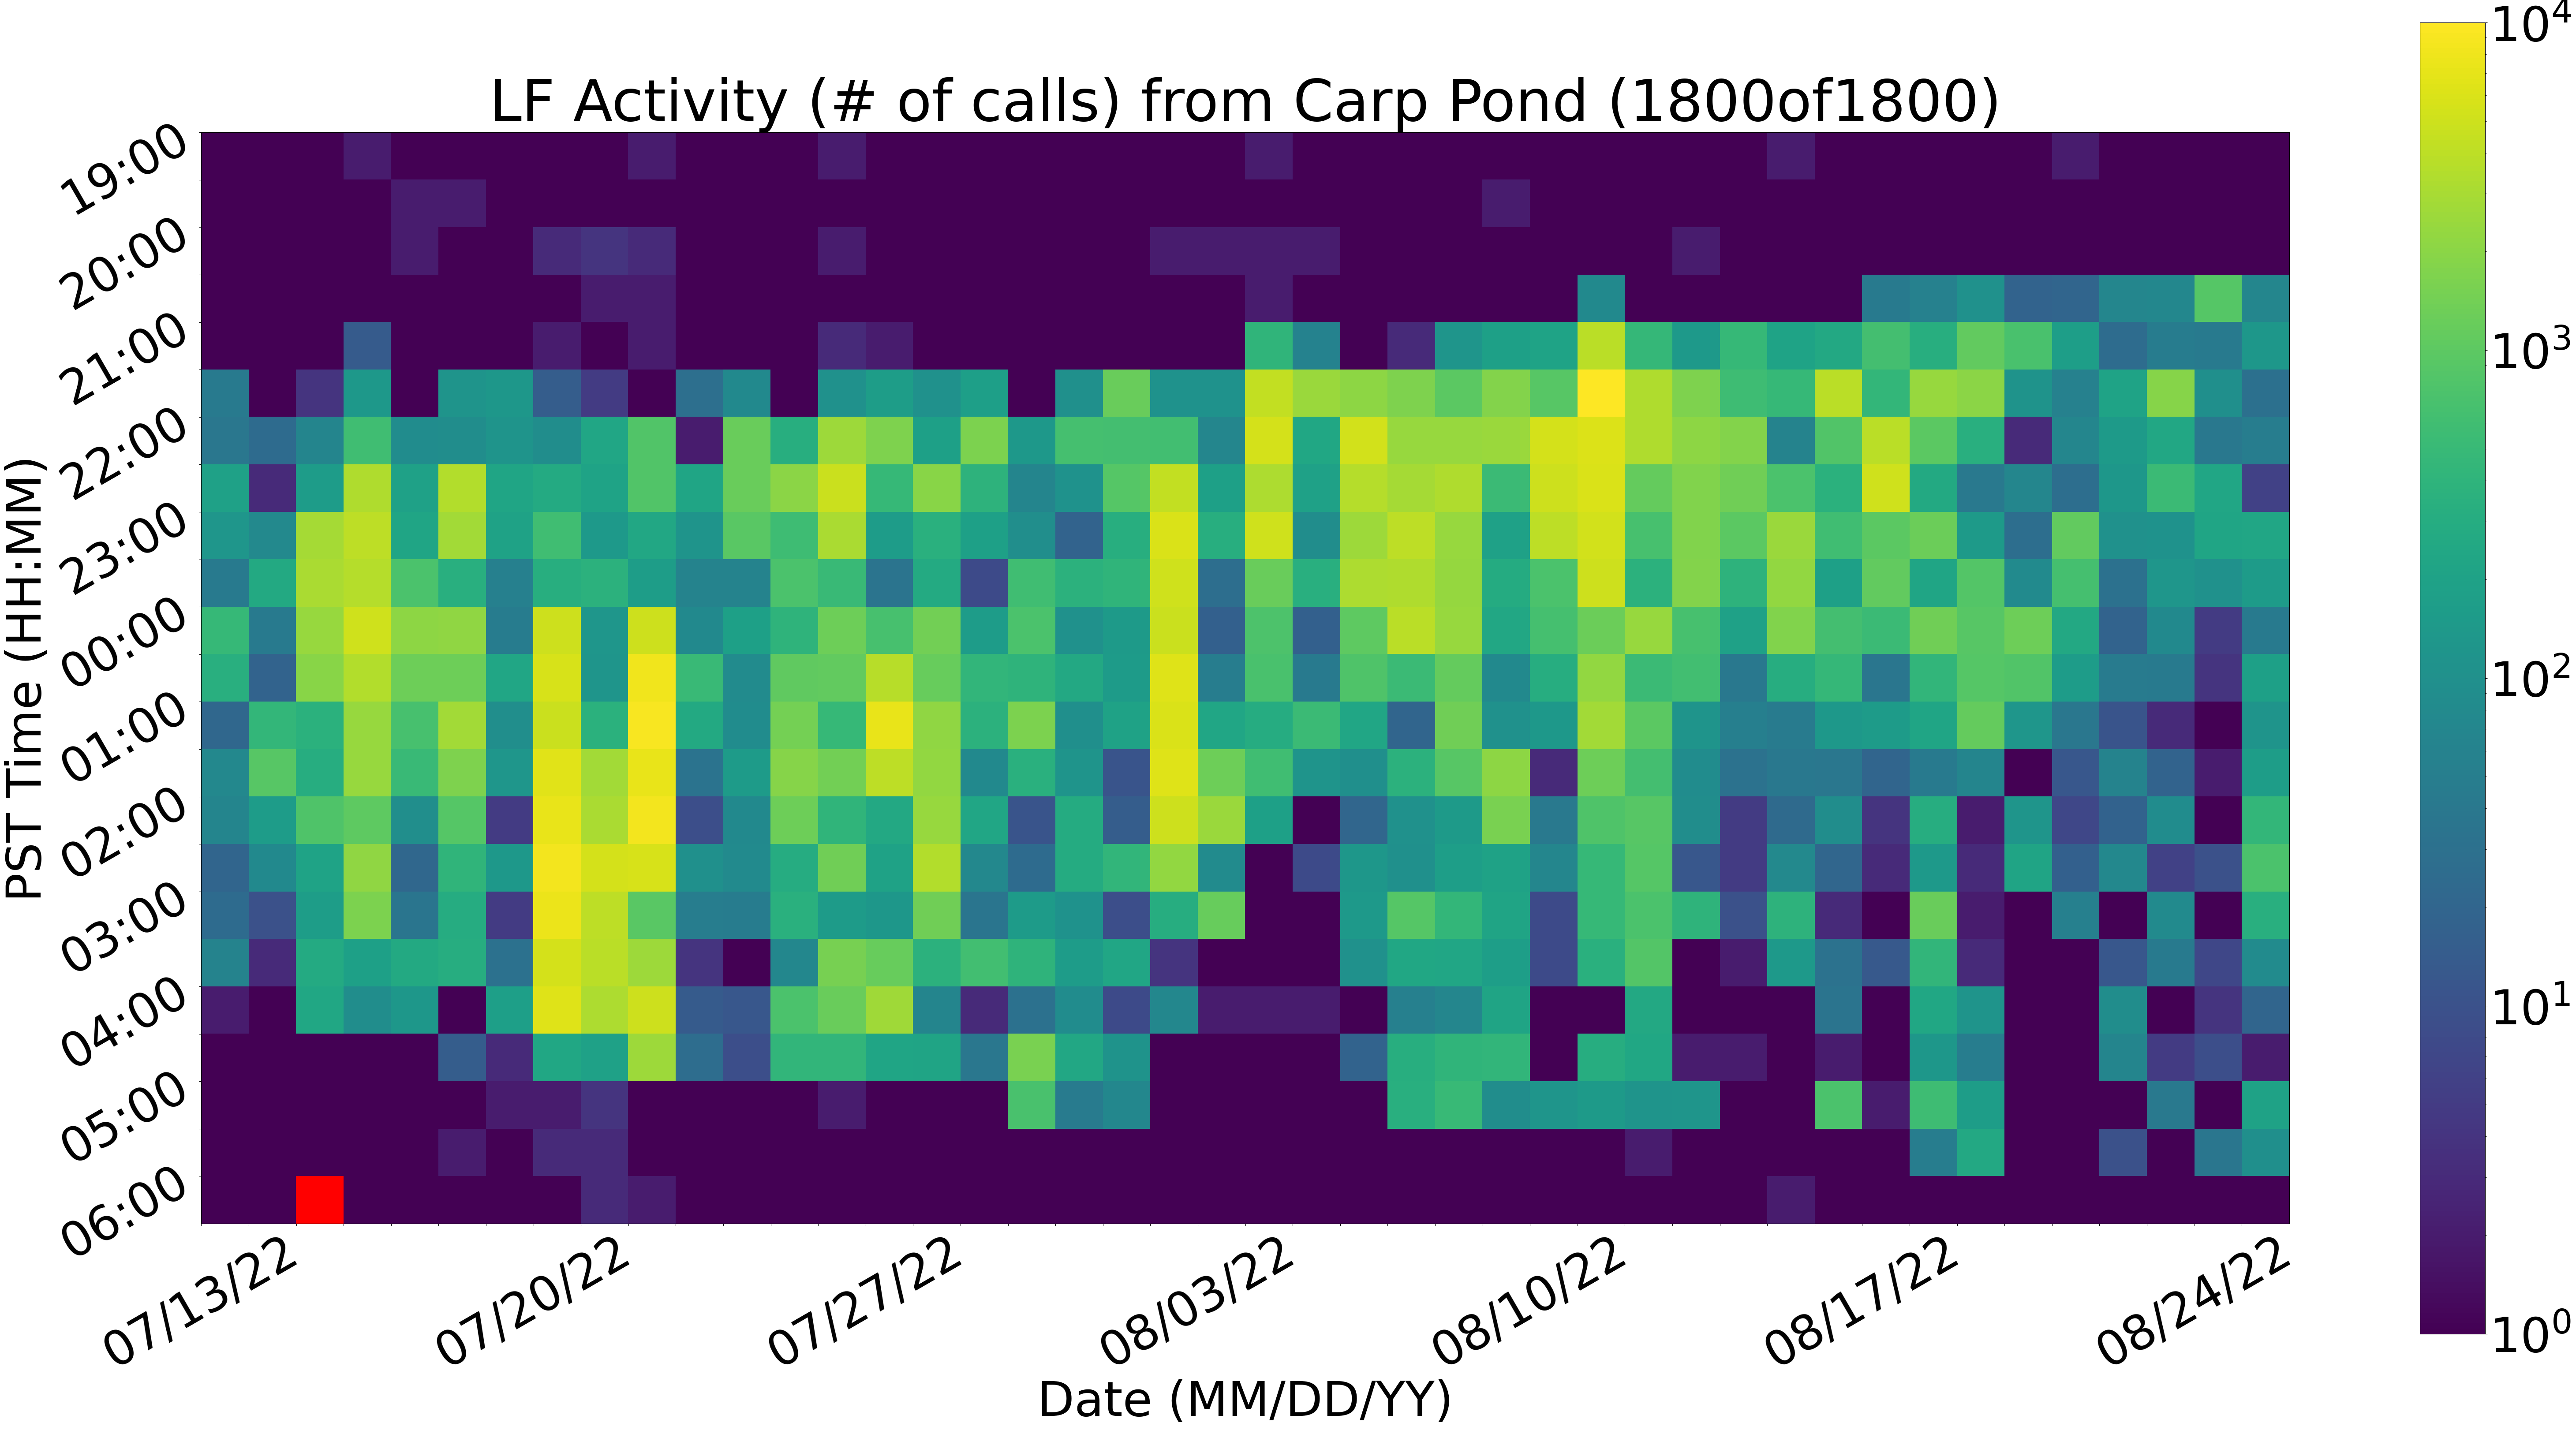

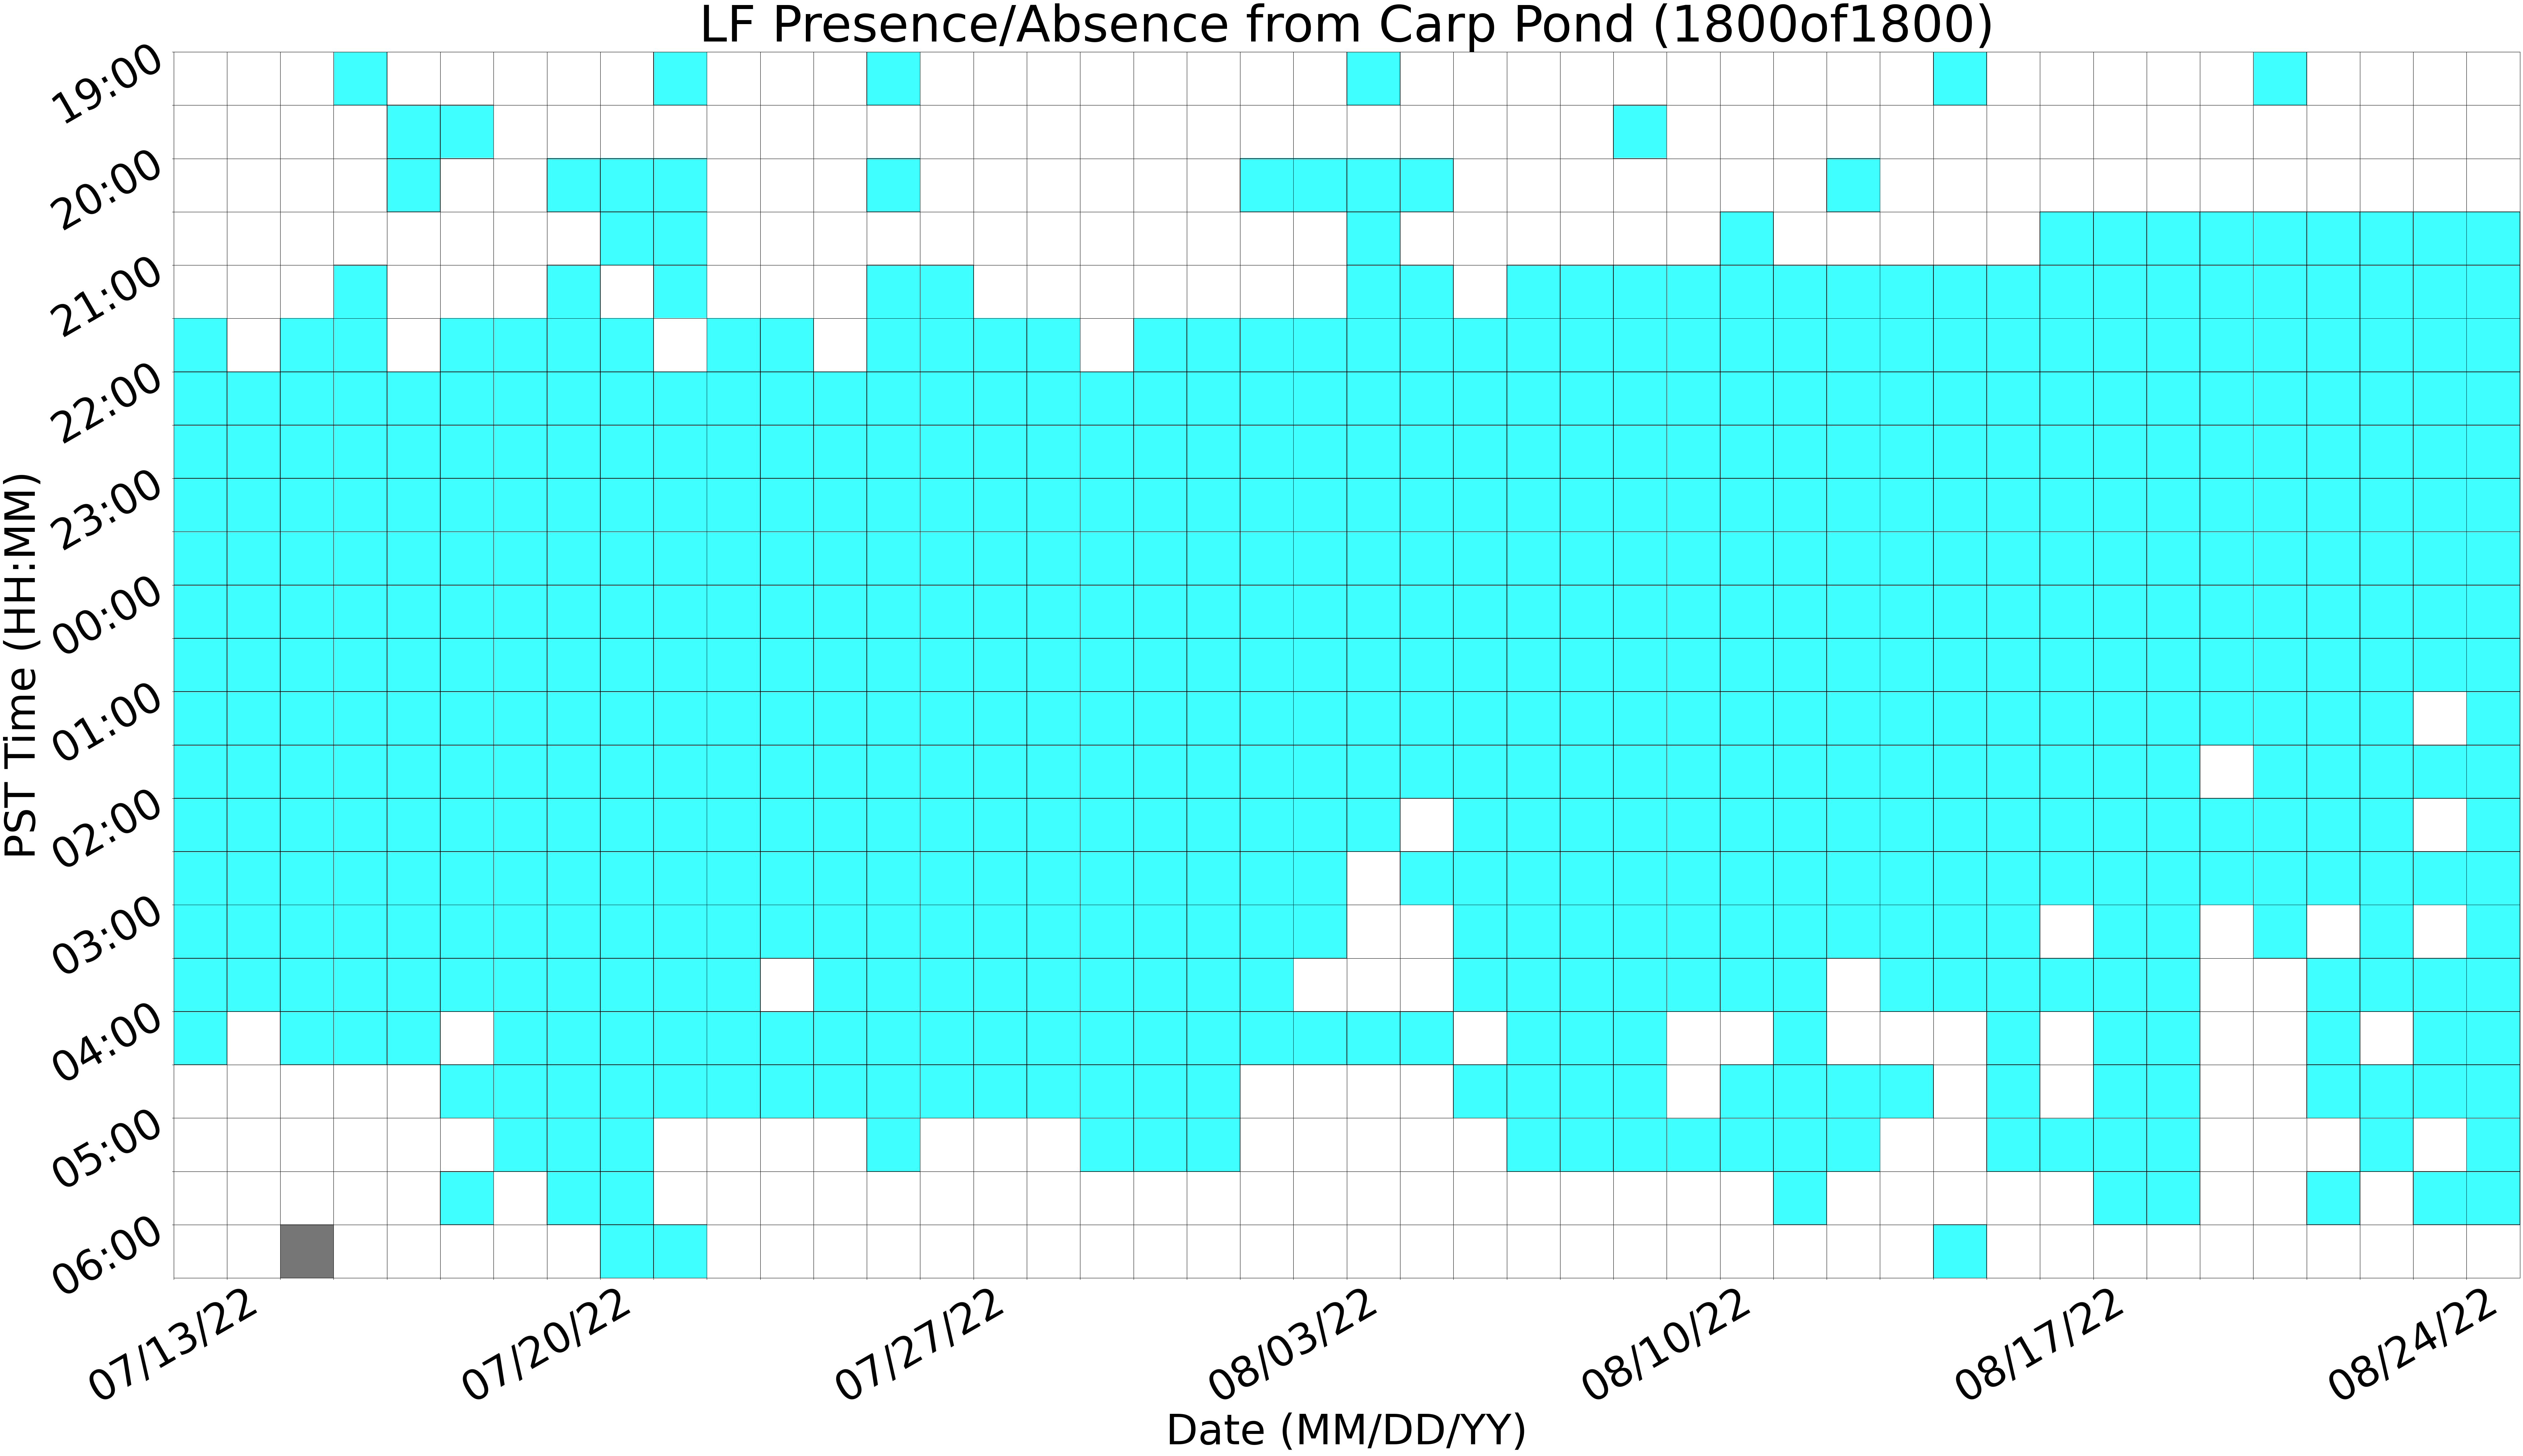

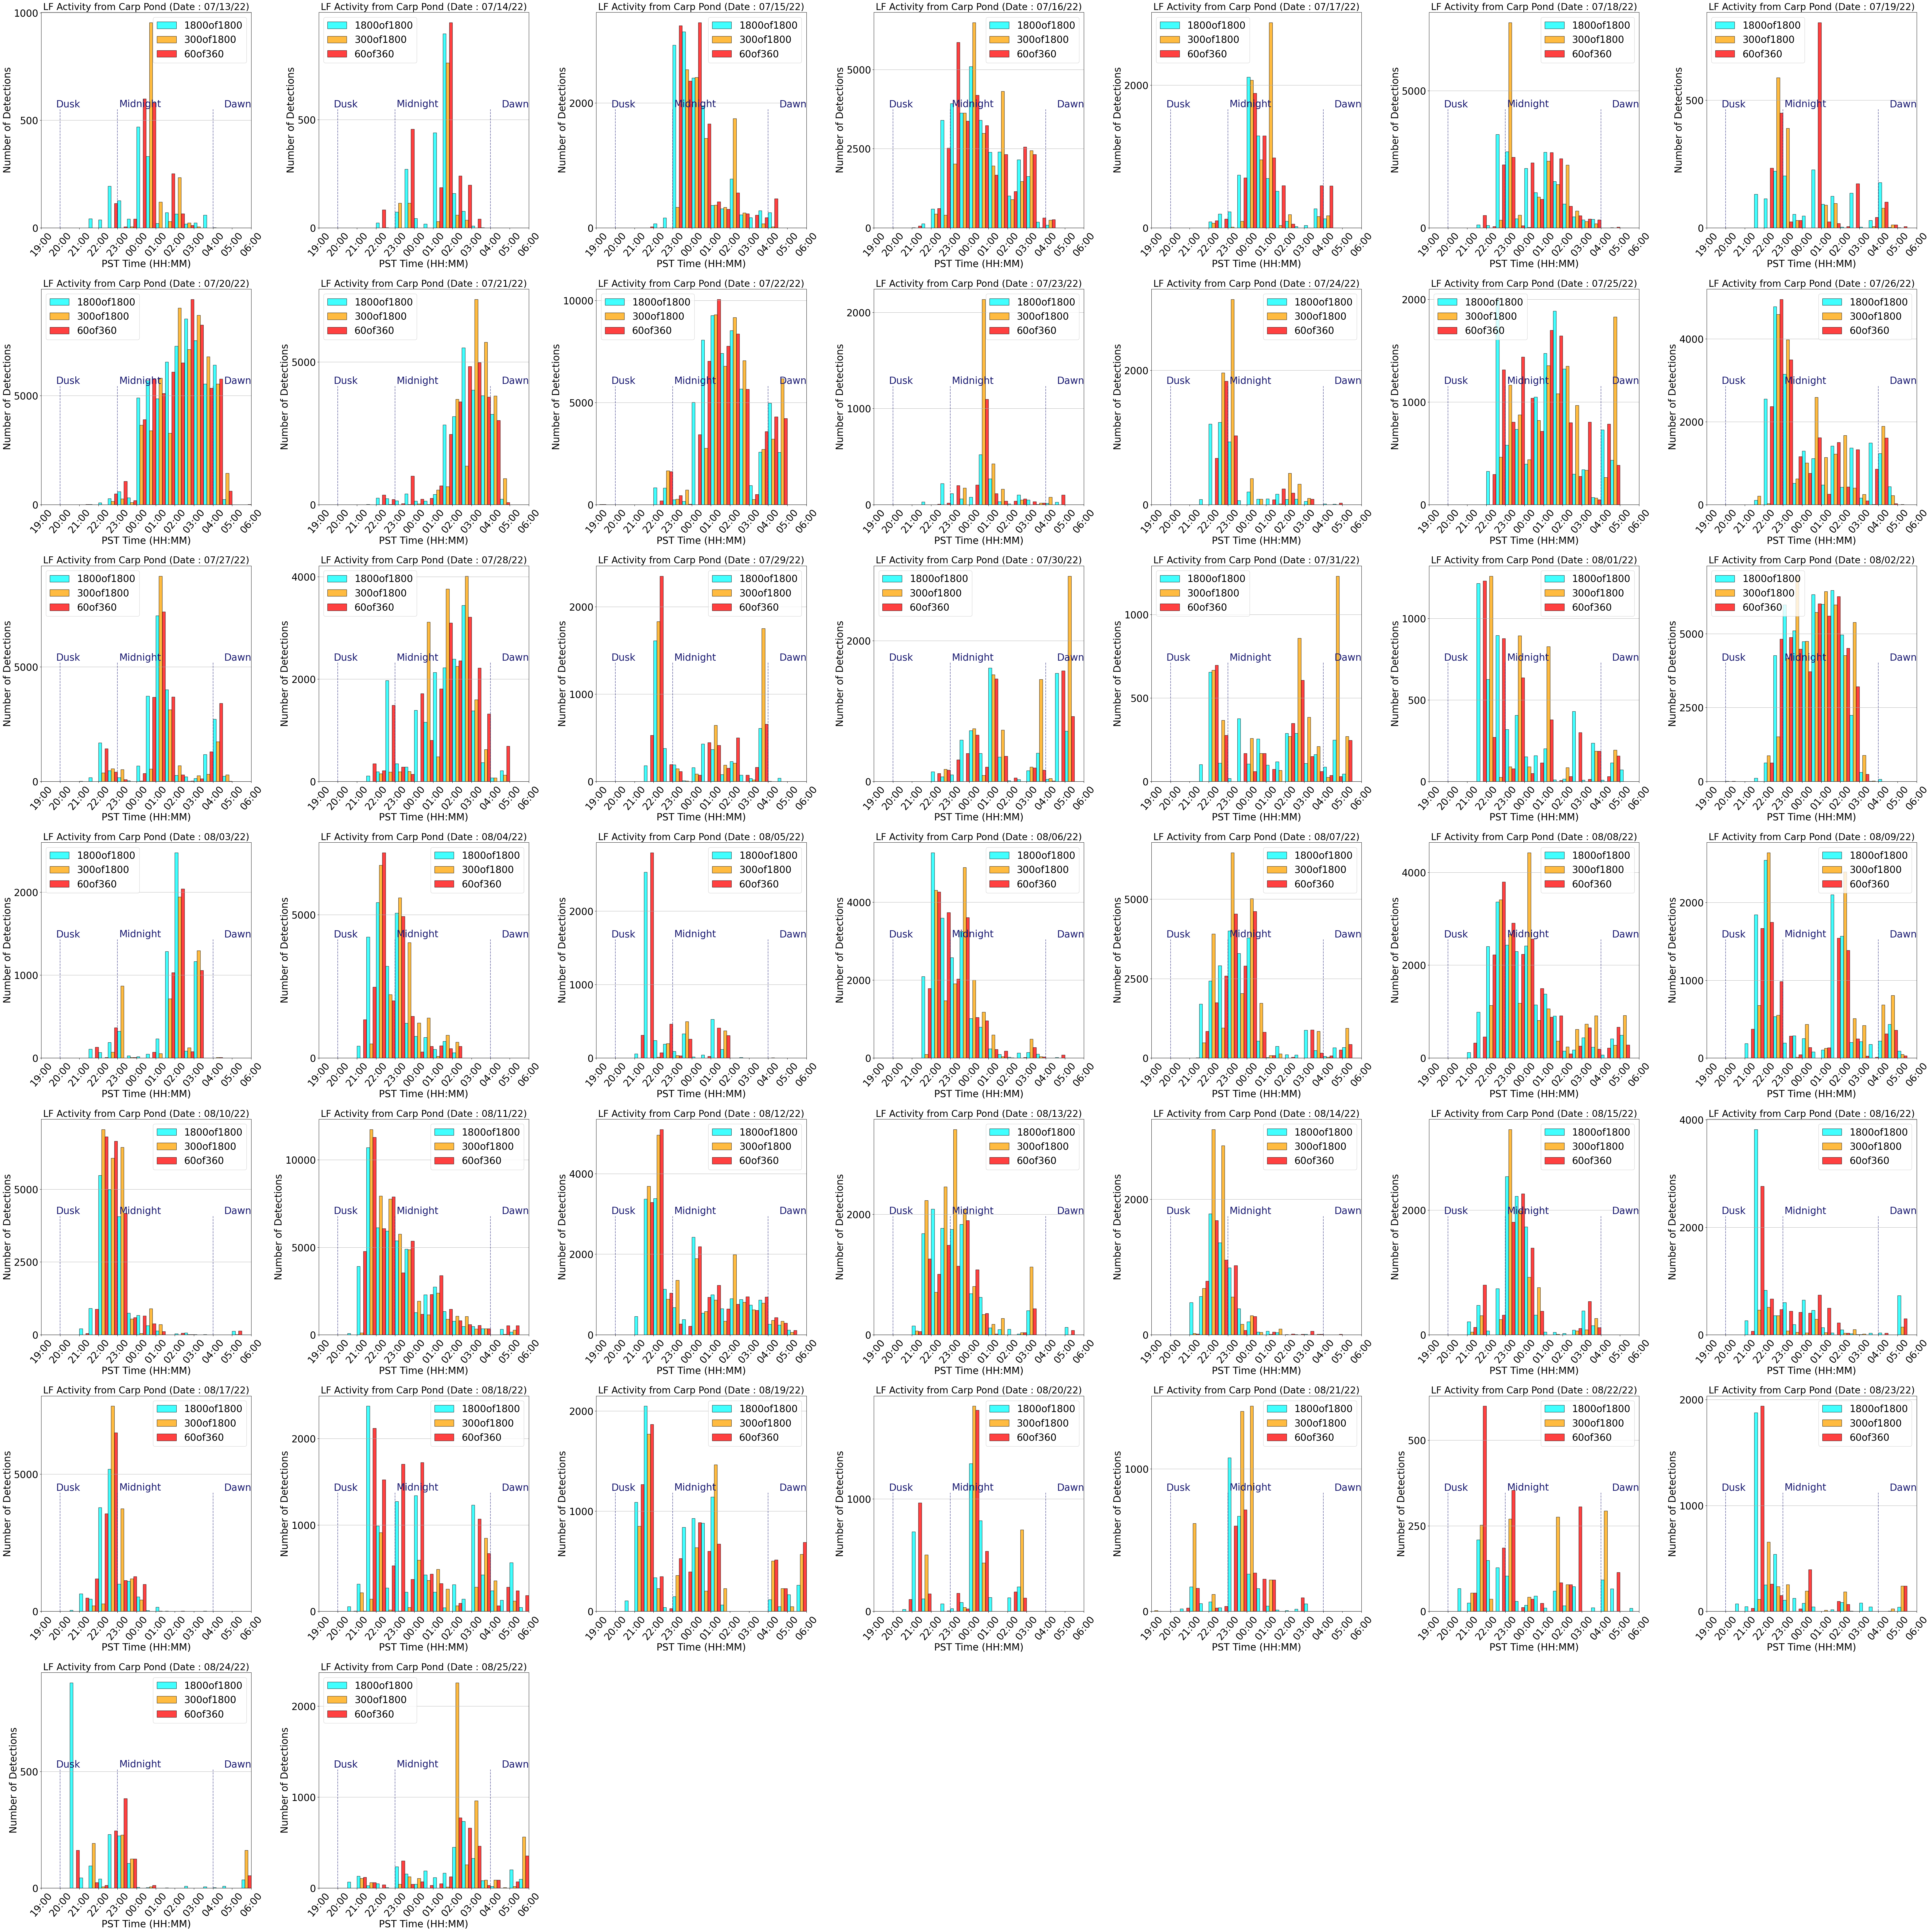

In [11]:
pipeline.plot(activity_arr, data_params, pipeline_params, file_paths)